# Investigating the Causes of a High Unemployment Rate in South Africa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Questions for Tutors:

- Are we using too many cells for small parts of code, should we combine to more lengthy paragraph where we explain a whole section?
- For the QQ Plot, was the normalcy test correctly analysed?
- Please may we ask you to provide feedback according to the rubric so we know where we need to improve?

## <u>Introduction</u>

Ever-present high unemployment rates are engrained in the history of South Africa, and have received wide media coverage and research due to its vast implications on all facets of South Africa [(News Article)](https://www.gcis.gov.za/content/resourcecentre/newsletters/insight/issue13#). Currently, South Africa is facing an issue where the unemployment rate of its labour force is slowly increasing. This is a huge issue as more and more South Africans are struggling to find jobs which is leading to a larger part of the population without an income, further increasing the number of South Africans in poverty. Previous studies indicate that the education level of job seekers contributes towards the high unemployment rate. This is because most employment opportunities require atleast a Matric Certificate making it difficult for a large portion of job seekers which do not have any qualification to find employment.

In this project we will investigate other possible socio-ecoonomic factors that may contribute to the high unemployment rate in South Africa. We wish to establish any existing relationships between these factors and the high unemployment rate and also establish whether the different factors are dependent/independent of each other. At the end of the investigation we will be able to answer the following.
<br>

### <u>Research Question</u>
- What are the leading socioeconomic factors influencing the unemployment rate in South Africa?
- Can the unemployment rate be modelled using economic factors in South Africa?

### <u>Hypothesis</u>
Socioeconomic factors such as school enrollment, GDP, Inflation, Imports and Exports of goods and primary resources, Labor Force, and Government Expinditure on Education influence the unemployment rate in South Africa.


### <u>Data Description</u>
In order to perform this invstigation a dataset adapted from [(Download Here)](https://data.humdata.org/dataset/c479e754-3b38-4d8b-a6f8-e6562cdc90e9/resource/392e66e7-f092-43a4-bb0c-28dd95ac083e/download/indicators_zaf.csv) will be used. 
<!-- This dataset was compiled in ... . It consist of data from x countries about several socio-economic factors collected from 1960 to 2020. It was intended to be used for .... -->
<!-- The size of the dataset is 77604 rows x 6 columns. -->
A brief description of the different fields present in the data is shown in the table below 

| Variable Name | Type | Description |
| ---    | --- | --- |
| Country Name | String | Gives the name of the country |
| Country ISO3 | String | Codes for the representation of names of countries and their subdivisions.
| Year | int | The year the data was recorded|
| Indicator Name | String | The name of the features or variables|
| Indicator Code | int |  The code used to referrence the feature/varaible|
|Value | float | Give the value of the features| float|

The initial size of the dataset was 77604 rows x 6 columns. Since the data only contains information from South Africa, we removed the country name, the country ISO3, and the indicator code as they are unnecessary and redundant for the purpose of our investigation, thus reducing the number of columns in our dataset to 3. Then, given that the initial dataset contains 3902 unique indicator names, we used a correlation matrix to extract 10 relevant indicators in an attempt to answer the research question, thus leaving us with 427 rows. 

The data is collected by the Humanitarian Data Exchange every month, this particular dataset was downloaded by us on the 28th of March 2021 to assist us in our investigation.

To validate our data, we compared this to similar datasets that was compiled by the World Bank and IMF.[(See Here)](https://knoema.com/atlas/South-Africa/Unemployment-rate?action=export&gadget=indicator-preview-host)

All the records in the dataset are valid and the same units used across a given field even though in some records there are missing fields. Through the method of using the mean to fill missing values,this problem will be solved. This data conforms to the standard format and it agrees with reality. After an initial audit, and using the methodology described to extract the features affecting the change in unemployment, it is concluded that the data is very useful and our research question is answerable.



<!-- Given the size of the whole dataset, the number of unique indicators, and our methodology to extract the features affecting the change in unemployment, the data is very useful and will be able to answer our research question. -->

### <u>Methodology</u>
1. Load, clean and wrangle data : <br>
- Extract initial dataset from .csv
- Drop the unecassary and redundant variables as discussed in our Data Description.
- Change the remaining variables to the appropriate data types.
- Set index to be the year of recording, to form Time-Series data.
- Determine and Fill Missing values in Columns with Mean.
- Pivot the data to make it easier to work with, as well as make each indicator name value a column itself, to finalise the format of Time-Series data.
 <br>

2. Exploratory plots and analysis :
- Now that the data has been cleaned, we utilize the describe function to investigate some of the basic summary statistics of our cleaned data.
- Use a Correlation Matrix to extract the relationship between our features affecting the unemployment rate, and the unemployment rate.
- Line Plots of all of our potential features vs time, as well as the unemployment rate itself and its change over time.
- Use scatter plots to verify and visualise the relationship seen in the correlation vector, between the factors affecting the unemployment rate, and the unemployement rate itself.

3. Model Fitting:
- trying to analyse the relationship between and response variables, we assume a linear relationship and thus use linear regression as a modelling technique.
- split dataset into training and testing datasets.
- using the statsmodels package, we are able to fit our model and analyse its diagnostics using the summary method.
- we create an initial model containing all chosen variables, as well as an improved model derived using various techniques described more specifically in the model fitting section.

4. Hypothesis Testing
- using the various diagnostics and tests provided by the summary method in the statsmodels package, we determine the significant explanatory variables for best describing our response.
- we further discuss the diagnostics and tests, and justify our results.

5. Interpretation of Results
- we interpret the various diagnostics in relation to our model.
- we interpret the results of our model.
- we interpret our model results vs initially expected results.

## <u>1.) Data Cleaning</u>

##### Extract initial dataset from .csv, and drop the unnecessary and redundant variables as discussed in our Data Description

In [2]:
df_indicators = pd.read_csv('indicators_zaf.csv', header=0)
#display(df_indicators.head())

df_indicators.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1,inplace = True)
#display(df_indicators.head())

##### Change the remaining variables to the appropriate type, and set index to be the year of recording, to form Time-Series data.

In [3]:
df_indicators['Value'] = df_indicators['Value'].astype(float)
df_indicators['Year'] = pd.to_datetime(df_indicators['Year'],format = '%Y', errors='ignore')
df_indicators.index = df_indicators['Year']
df_indicators.drop(['Year'],axis=1, inplace=True)

# uncomment to view data type change
#print('Index datatype:')
#print(df_indicators.index.dtype, '\n')
#print('df_indicators info:')
#display(df_indicators.info())

##### We pivot the data to make it easier to work with, as well as make each indicator name value a column itself. To finalise the format of Time-Series data, we create a dataframe that contains the relevant features for our investigation, on which we later in the notebook fill in the missing values using a relevant filling technique. Then, we create a copy of df_clean for other purposes, to prevent us from affecting the cleaned, filled-in data.

In [4]:
df_pivot = df_indicators.pivot_table(values='Value', index=df_indicators.index, columns = 'Indicator Name')
#display(df_pivot.head())

df_clean = df_pivot[['Unemployment, total (% of total labor force) (national estimate)','GDP (current US$)','Current education expenditure, total (% of total expenditure in public institutions)','Imports of goods, services and primary income (BoP, current US$)','Exports of goods and services (BoP, current US$)','School enrollment, primary (% gross)','Inflation, consumer prices (annual %)','Government expenditure on education, total (% of government expenditure)','Labor force, total','Population, total','New businesses registered (number)']]
df_clean_v2 = df_pivot[['Unemployment, total (% of total labor force) (national estimate)',
                        'Current education expenditure, total (% of total expenditure in public institutions)',
                        'Imports of goods, services and primary income (BoP, current US$)','Exports of goods and services (BoP, current US$)',
                        'School enrollment, primary (% gross)','Inflation, consumer prices (annual %)',
                        'Government expenditure on education, total (% of government expenditure)','Labor force, total',
                        'New businesses registered (number)','Access to electricity (% of population)',
                       'Rural population growth (annual %)','Population growth (annual %)','Urban population growth (annual %)',
                       'Agricultural land (% of land area)','Arable land (% of land area)','Adolescent fertility rate (births per 1,000 women ages 15-19)',
                       'School enrollment, primary and secondary (gross), gender parity index (GPI)','Prevalence of HIV, total (% of population ages 15-49)',
                       'Life expectancy at birth, total (years)','Survival to age 65, female (% of cohort)','Survival to age 65, male (% of cohort)',
                       'Short-term debt (% of total reserves)','Total reserves (includes gold, current US$)','Current account balance (% of GDP)',
                       'GDP growth (annual %)']]
df_scatter = df_clean.copy()
df_clean_v2.head()

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,NaN,NaN,2.256799e+09,2.238599e+09,NaN,1.288878,NaN,NaN,NaN,NaN,...,79.2902,NaN,NaN,48.406,46.791759,36.183889,NaN,272204000.0,0.646831,NaN
1961-01-01,NaN,NaN,2.134999e+09,2.337999e+09,NaN,2.102343,NaN,NaN,NaN,NaN,...,80.5886,NaN,NaN,48.777,47.258431,36.659105,NaN,394839500.0,3.388938,3.844751
1962-01-01,NaN,NaN,2.153199e+09,2.498999e+09,NaN,1.246290,NaN,NaN,NaN,NaN,...,81.8870,NaN,NaN,49.142,47.725103,37.134321,NaN,647247500.0,5.057661,6.177883
1963-01-01,NaN,NaN,2.571799e+09,2.696399e+09,NaN,1.337968,NaN,NaN,NaN,NaN,...,83.2388,NaN,NaN,49.509,48.253298,37.695298,NaN,774940000.0,2.065072,7.373613
1964-01-01,NaN,NaN,3.106599e+09,2.846199e+09,NaN,2.534980,NaN,NaN,NaN,NaN,...,84.5906,NaN,NaN,49.888,48.781493,38.256276,NaN,706829200.0,-1.551957,7.939782


##### Here we determine the number of rows in the dataframe with missing values

In [5]:
nrows_missing = df_clean_v2.shape[0] - df_clean_v2.dropna().shape[0]
df_missing = pd.Series(df_clean_v2.isnull().sum())
print('Number of rows with missing data:', nrows_missing,'\n')
display(df_missing)

Number of rows with missing data: 56 



Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        39
Current education expenditure, total (% of total expenditure in public institutions)    50
Imports of goods, services and primary income (BoP, current US$)                         1
Exports of goods and services (BoP, current US$)                                         1
School enrollment, primary (% gross)                                                    24
Inflation, consumer prices (annual %)                                                    1
Government expenditure on education, total (% of government expenditure)                46
Labor force, total                                                                      30
New businesses registered (number)                                                      50
Access to electricity (% of population)                                                 38
Rural population growth (annual %)                                         

##### From the number of rows missing in each column, it can be seen that multiple only have one row with missing values. Upon investigation, we found that one feature had a recording for the year 2020, while the others did not. For that reason we drop the last row, the year 2020.

In [6]:
df_clean_v2 = df_clean_v2.iloc[:-1,:]
nrows_missing = df_clean_v2.shape[0] - df_clean_v2.dropna().shape[0]
df_missing = pd.Series(df_clean_v2.isnull().sum())
print('Number of rows with missing data:', nrows_missing,'\n')
display(df_missing)

Number of rows with missing data: 55 



Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        38
Current education expenditure, total (% of total expenditure in public institutions)    49
Imports of goods, services and primary income (BoP, current US$)                         0
Exports of goods and services (BoP, current US$)                                         0
School enrollment, primary (% gross)                                                    23
Inflation, consumer prices (annual %)                                                    0
Government expenditure on education, total (% of government expenditure)                45
Labor force, total                                                                      30
New businesses registered (number)                                                      49
Access to electricity (% of population)                                                 37
Rural population growth (annual %)                                         

Fill in missing values with mean

In [7]:
ind = df_clean_v2.columns
for i in ind:
    df_clean_v2[i] = df_clean_v2[i].fillna(df_clean_v2[i].mean())
    
df_clean_v2.head()

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,26.978637,95.311564,2.256799e+09,2.238599e+09,100.30584,1.288878,18.939744,1.783213e+07,270518.272727,79.055589,...,79.2902,1.013252,13.383333,48.406,46.791759,36.183889,111.709938,272204000.0,0.646831,2.940889
1961-01-01,26.978637,95.311564,2.134999e+09,2.337999e+09,100.30584,2.102343,18.939744,1.783213e+07,270518.272727,79.055589,...,80.5886,1.013252,13.383333,48.777,47.258431,36.659105,111.709938,394839500.0,3.388938,3.844751
1962-01-01,26.978637,95.311564,2.153199e+09,2.498999e+09,100.30584,1.246290,18.939744,1.783213e+07,270518.272727,79.055589,...,81.8870,1.013252,13.383333,49.142,47.725103,37.134321,111.709938,647247500.0,5.057661,6.177883
1963-01-01,26.978637,95.311564,2.571799e+09,2.696399e+09,100.30584,1.337968,18.939744,1.783213e+07,270518.272727,79.055589,...,83.2388,1.013252,13.383333,49.509,48.253298,37.695298,111.709938,774940000.0,2.065072,7.373613
1964-01-01,26.978637,95.311564,3.106599e+09,2.846199e+09,100.30584,2.534980,18.939744,1.783213e+07,270518.272727,79.055589,...,84.5906,1.013252,13.383333,49.888,48.781493,38.256276,111.709938,706829200.0,-1.551957,7.939782


In [8]:
df_clean = df_clean.assign(FillMean=df_clean['Unemployment, total (% of total labor force) (national estimate)'].fillna(df_clean['Unemployment, total (% of total labor force) (national estimate)'].mean()))
df_clean.drop(['Unemployment, total (% of total labor force) (national estimate)'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'Unemployment, total (% of total labor force) (national estimate)'})

df_clean = df_clean.assign(FillMean=df_clean['Current education expenditure, total (% of total expenditure in public institutions)'].fillna(df_clean['Current education expenditure, total (% of total expenditure in public institutions)'].mean()))
df_clean.drop(['Current education expenditure, total (% of total expenditure in public institutions)'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'Current education expenditure, total (% of total expenditure in public institutions)'})

df_clean = df_clean.assign(FillMean=df_clean['School enrollment, primary (% gross)'].fillna(df_clean['School enrollment, primary (% gross)'].mean()))
df_clean.drop(['School enrollment, primary (% gross)'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'School enrollment, primary (% gross)'})

df_clean = df_clean.assign(FillMean=df_clean['Government expenditure on education, total (% of government expenditure)'].fillna(df_clean['Government expenditure on education, total (% of government expenditure)'].mean()))
df_clean.drop(['Government expenditure on education, total (% of government expenditure)'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'Government expenditure on education, total (% of government expenditure)'})

df_clean = df_clean.assign(FillMean=df_clean['Labor force, total'].fillna(df_clean['Labor force, total'].mean()))
df_clean.drop(['Labor force, total'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'Labor force, total'})

df_clean = df_clean.assign(FillMean=df_clean['New businesses registered (number)'].fillna(df_clean['New businesses registered (number)'].mean()))
df_clean.drop(['New businesses registered (number)'],axis=1,inplace=True)
df_clean = df_clean.rename(columns={'FillMean': 'New businesses registered (number)'})
display(df_clean.head())

Indicator Name,GDP (current US$),"Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","Inflation, consumer prices (annual %)","Population, total","Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","School enrollment, primary (% gross)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number)
Year,,,,,,,,,,,
1960-01-01,7.575397e+09,2.256799e+09,2.238599e+09,1.288878,17099840.0,26.978637,95.311564,100.30584,18.939744,1.795829e+07,270518.272727
1961-01-01,7.972997e+09,2.134999e+09,2.337999e+09,2.102343,17524533.0,26.978637,95.311564,100.30584,18.939744,1.795829e+07,270518.272727
1962-01-01,8.497997e+09,2.153199e+09,2.498999e+09,1.246290,17965725.0,26.978637,95.311564,100.30584,18.939744,1.795829e+07,270518.272727
1963-01-01,9.423396e+09,2.571799e+09,2.696399e+09,1.337968,18423161.0,26.978637,95.311564,100.30584,18.939744,1.795829e+07,270518.272727
1964-01-01,1.037400e+10,3.106599e+09,2.846199e+09,2.534980,18896307.0,26.978637,95.311564,100.30584,18.939744,1.795829e+07,270518.272727


## <u>2.) Exploratory Data Analysis</u>

In this section we aim to use statistical methods and plots to make inferences about the possible causes of a high unemployement rate in South Africa. The features chosen to be explored in this section were selected based on research into causes of a high unemployment rate, influenced by the paper by W.T.Bangane[1999]. We chose 12 features to exhaustively analyse the correlation between possible features and the unemployment rate, in an attempt to choose the best features for our investigation. 

We make use of the describe function to determine central tendencies about the chosen features, to examine underlying patterns and distributions. To visually examine these distributions we utilize boxplots, to visualize the spread and any outliers within each feature, however outliers are only removed in the modelling section. Now that an understanding has been formulated we use a Correlation Matrix to highlight any linear relationships between the variables.

##### Now that the data has been cleaned, we utilize the describe function to investigate some of the basic summary statistics of our cleaned data

In [9]:
display(df_clean_v2.describe())
display(df_clean_v2.info())

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
count,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000
mean,26.978637,95.311564,4.455567e+10,3.991953e+10,100.305840,7.903920,18.939744,1.783213e+07,270518.272727,79.055589,...,85.905976,1.013252,13.383333,57.126034,56.812331,44.335858,111.709938,1.334058e+10,-1.290461,2.940889
std,1.718866,1.174686,4.499685e+10,3.814642e+10,7.227174,4.693604,0.436000,2.188570e+06,24286.104372,4.933469,...,15.010975,0.012521,4.434536,4.520720,7.206391,6.538190,58.798731,1.816352e+10,3.259943,2.414114
min,22.410000,87.187492,2.134999e+09,2.238599e+09,80.166557,-0.692030,17.906309,1.245477e+07,180877.000000,57.600000,...,65.751000,0.955310,0.700000,48.406000,46.391858,34.100958,42.122529,2.722040e+08,-7.318557,-2.137057
25%,26.978637,95.311564,1.189110e+10,9.957634e+09,100.305840,4.409521,18.939744,1.783213e+07,270518.272727,79.055589,...,70.332650,1.013252,13.383333,53.740000,50.234030,38.677009,79.068580,2.104219e+09,-3.702084,1.369264
50%,26.978637,95.311564,2.600285e+10,2.697917e+10,100.305840,6.510149,18.939744,1.783213e+07,270518.272727,79.055589,...,85.465488,1.013252,13.383333,57.135017,56.945520,44.306526,111.709938,3.621818e+09,-1.461479,3.027140
75%,26.978637,95.311564,6.939027e+10,6.084945e+10,104.918333,11.575891,18.939744,1.797354e+07,270518.272727,79.466692,...,99.408800,1.013252,16.025000,61.209250,62.931131,49.721155,111.709938,1.632080e+10,0.937755,4.558914
max,33.290001,97.872643,1.400000e+11,1.270000e+11,110.886971,18.654927,20.472050,2.332643e+07,376727.000000,91.229874,...,111.011000,1.051220,19.300000,63.857000,69.484458,55.053975,462.705392,5.505589e+10,5.763229,7.939782


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1960-01-01 to 2019-01-01
Data columns (total 25 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Unemployment, total (% of total labor force) (national estimate)                      60 non-null     float64
 1   Current education expenditure, total (% of total expenditure in public institutions)  60 non-null     float64
 2   Imports of goods, services and primary income (BoP, current US$)                      60 non-null     float64
 3   Exports of goods and services (BoP, current US$)                                      60 non-null     float64
 4   School enrollment, primary (% gross)                                                  60 non-null     float64
 5   Inflation, consumer prices (annual %)                              

None

##### Boxplots are used to visualise some of the basic summary statistics of each of the features

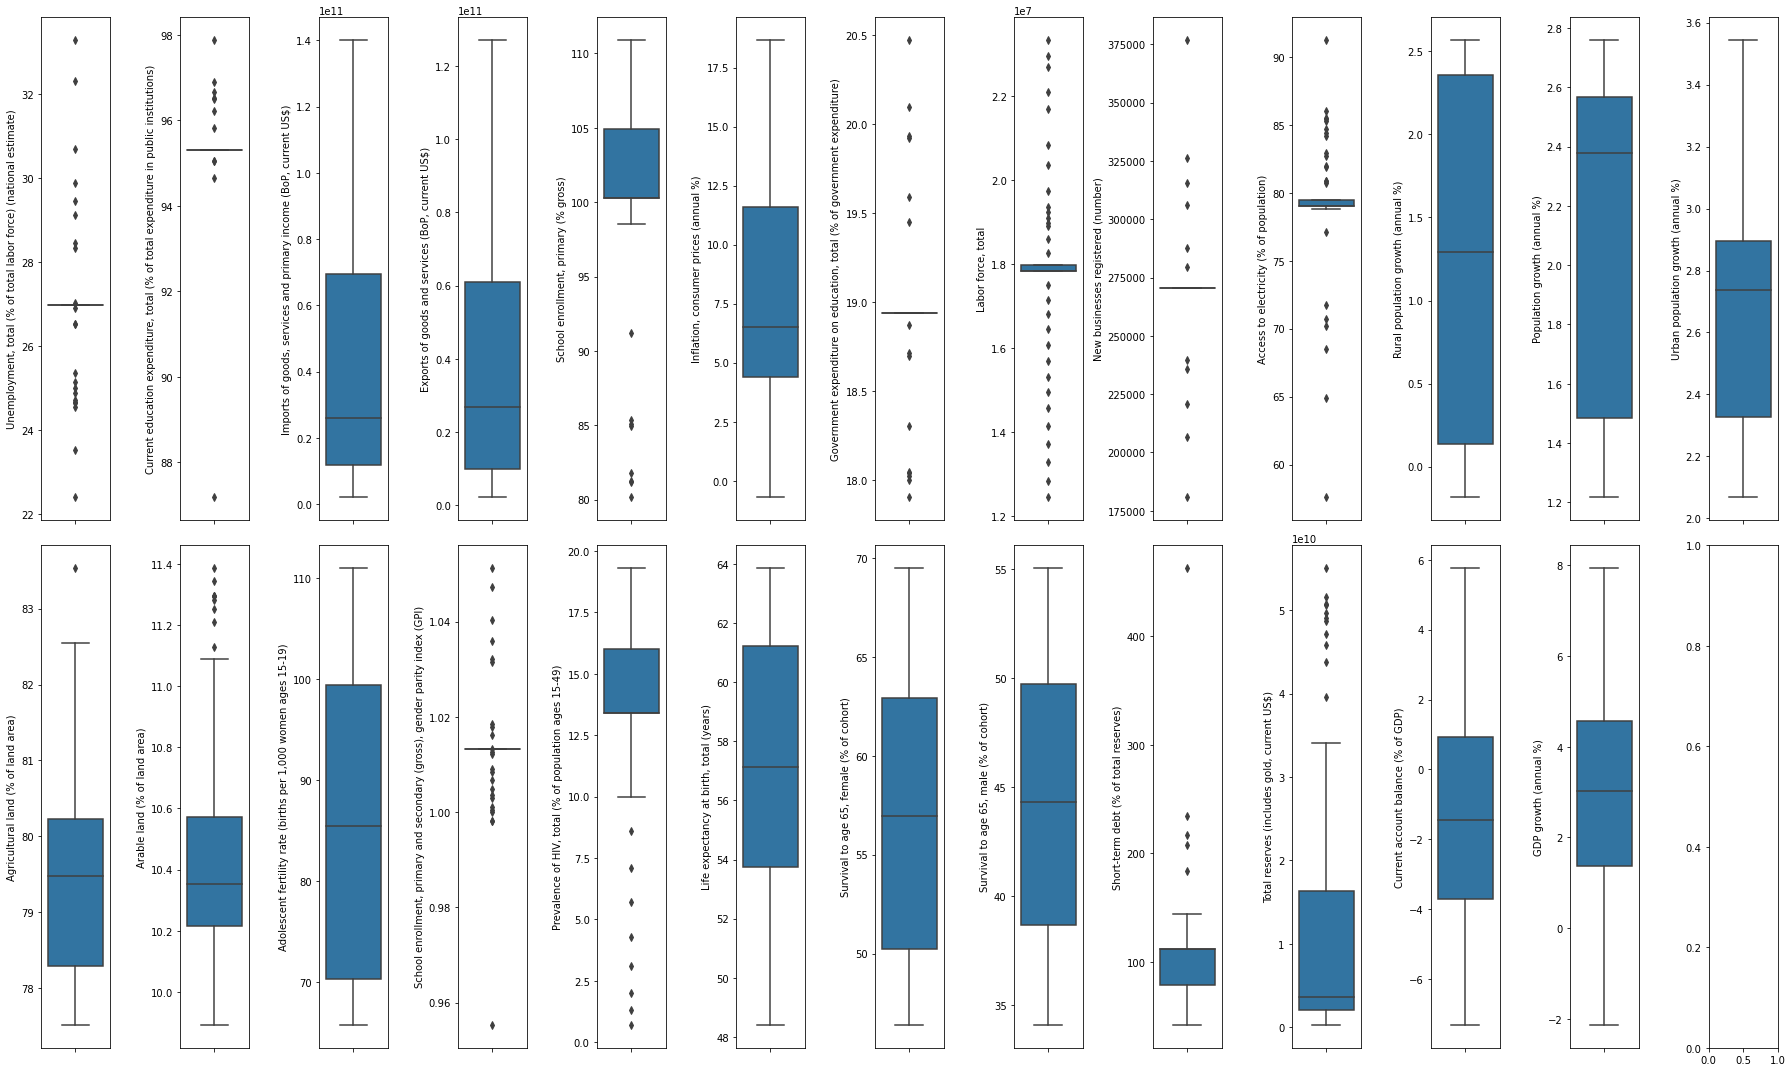

In [10]:
fig, axs = plt.subplots(2,13,figsize=(25,15))
count = 0
for j in range(2):
    for i in range(13):
        if(count>24):
            continue
        else:
            sns.boxplot(y=df_clean_v2[ind[count]],ax=axs[j,i])
            count+=1
fig.tight_layout()
plt.show()

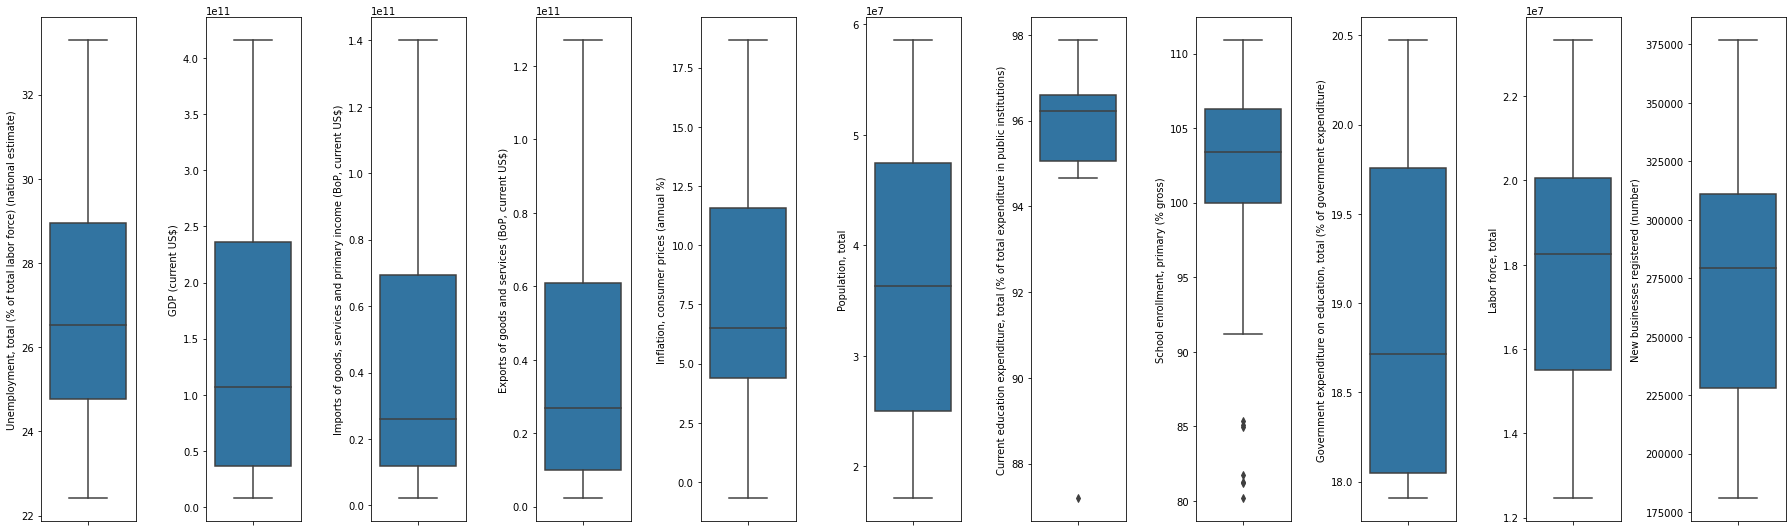

In [11]:
fig, axs = plt.subplots(1,11,figsize=(25,7.5))
sns.boxplot(y=df_scatter['Unemployment, total (% of total labor force) (national estimate)'],ax=axs[0])
sns.boxplot(y=df_scatter['GDP (current US$)'],ax=axs[1])
sns.boxplot(y=df_scatter['Imports of goods, services and primary income (BoP, current US$)'],ax=axs[2])
sns.boxplot(y=df_scatter['Exports of goods and services (BoP, current US$)'],ax=axs[3])
sns.boxplot(y=df_scatter['Inflation, consumer prices (annual %)'],ax=axs[4])
sns.boxplot(y=df_scatter['Population, total'],ax=axs[5])
sns.boxplot(y=df_scatter['Current education expenditure, total (% of total expenditure in public institutions)'],ax=axs[6])
sns.boxplot(y=df_scatter['School enrollment, primary (% gross)'],ax=axs[7])
sns.boxplot(y=df_scatter['Government expenditure on education, total (% of government expenditure)'],ax=axs[8])
sns.boxplot(y=df_scatter['Labor force, total'],ax=axs[9])
sns.boxplot(y=df_scatter['New businesses registered (number)'],ax=axs[10])
fig.tight_layout()
plt.show()

### <u>Analysis of Central Tendencies</u>

The unemployment rate has fluctuated over the last 60 with a mean of about 26.5% of the total labour force in South Africa, with a minimum of just over 22%, and a a maximum of 29%. Interstingly, it can be seen that there has been very little variation in the education expenditure as a percentage of total expenditure in public institutions, as well as primary school enrolment as a percentage of gross. This little variation can be backed by the 25th percentile being far closer to the mean, as compared with the 75th percentile of the government expenditure on education.

##### Validation and Analysis through Line Plots

In [12]:
df_validate = pd.read_excel("Knoema_SA_Data.xlsx")
df_validate['Date'] = pd.to_datetime(df_validate['Date'],format = '%Y', errors='ignore')
df_validate.index = df_validate['Date']
df_validate.drop(['Date'],axis=1, inplace=True)
#df_validate.head()

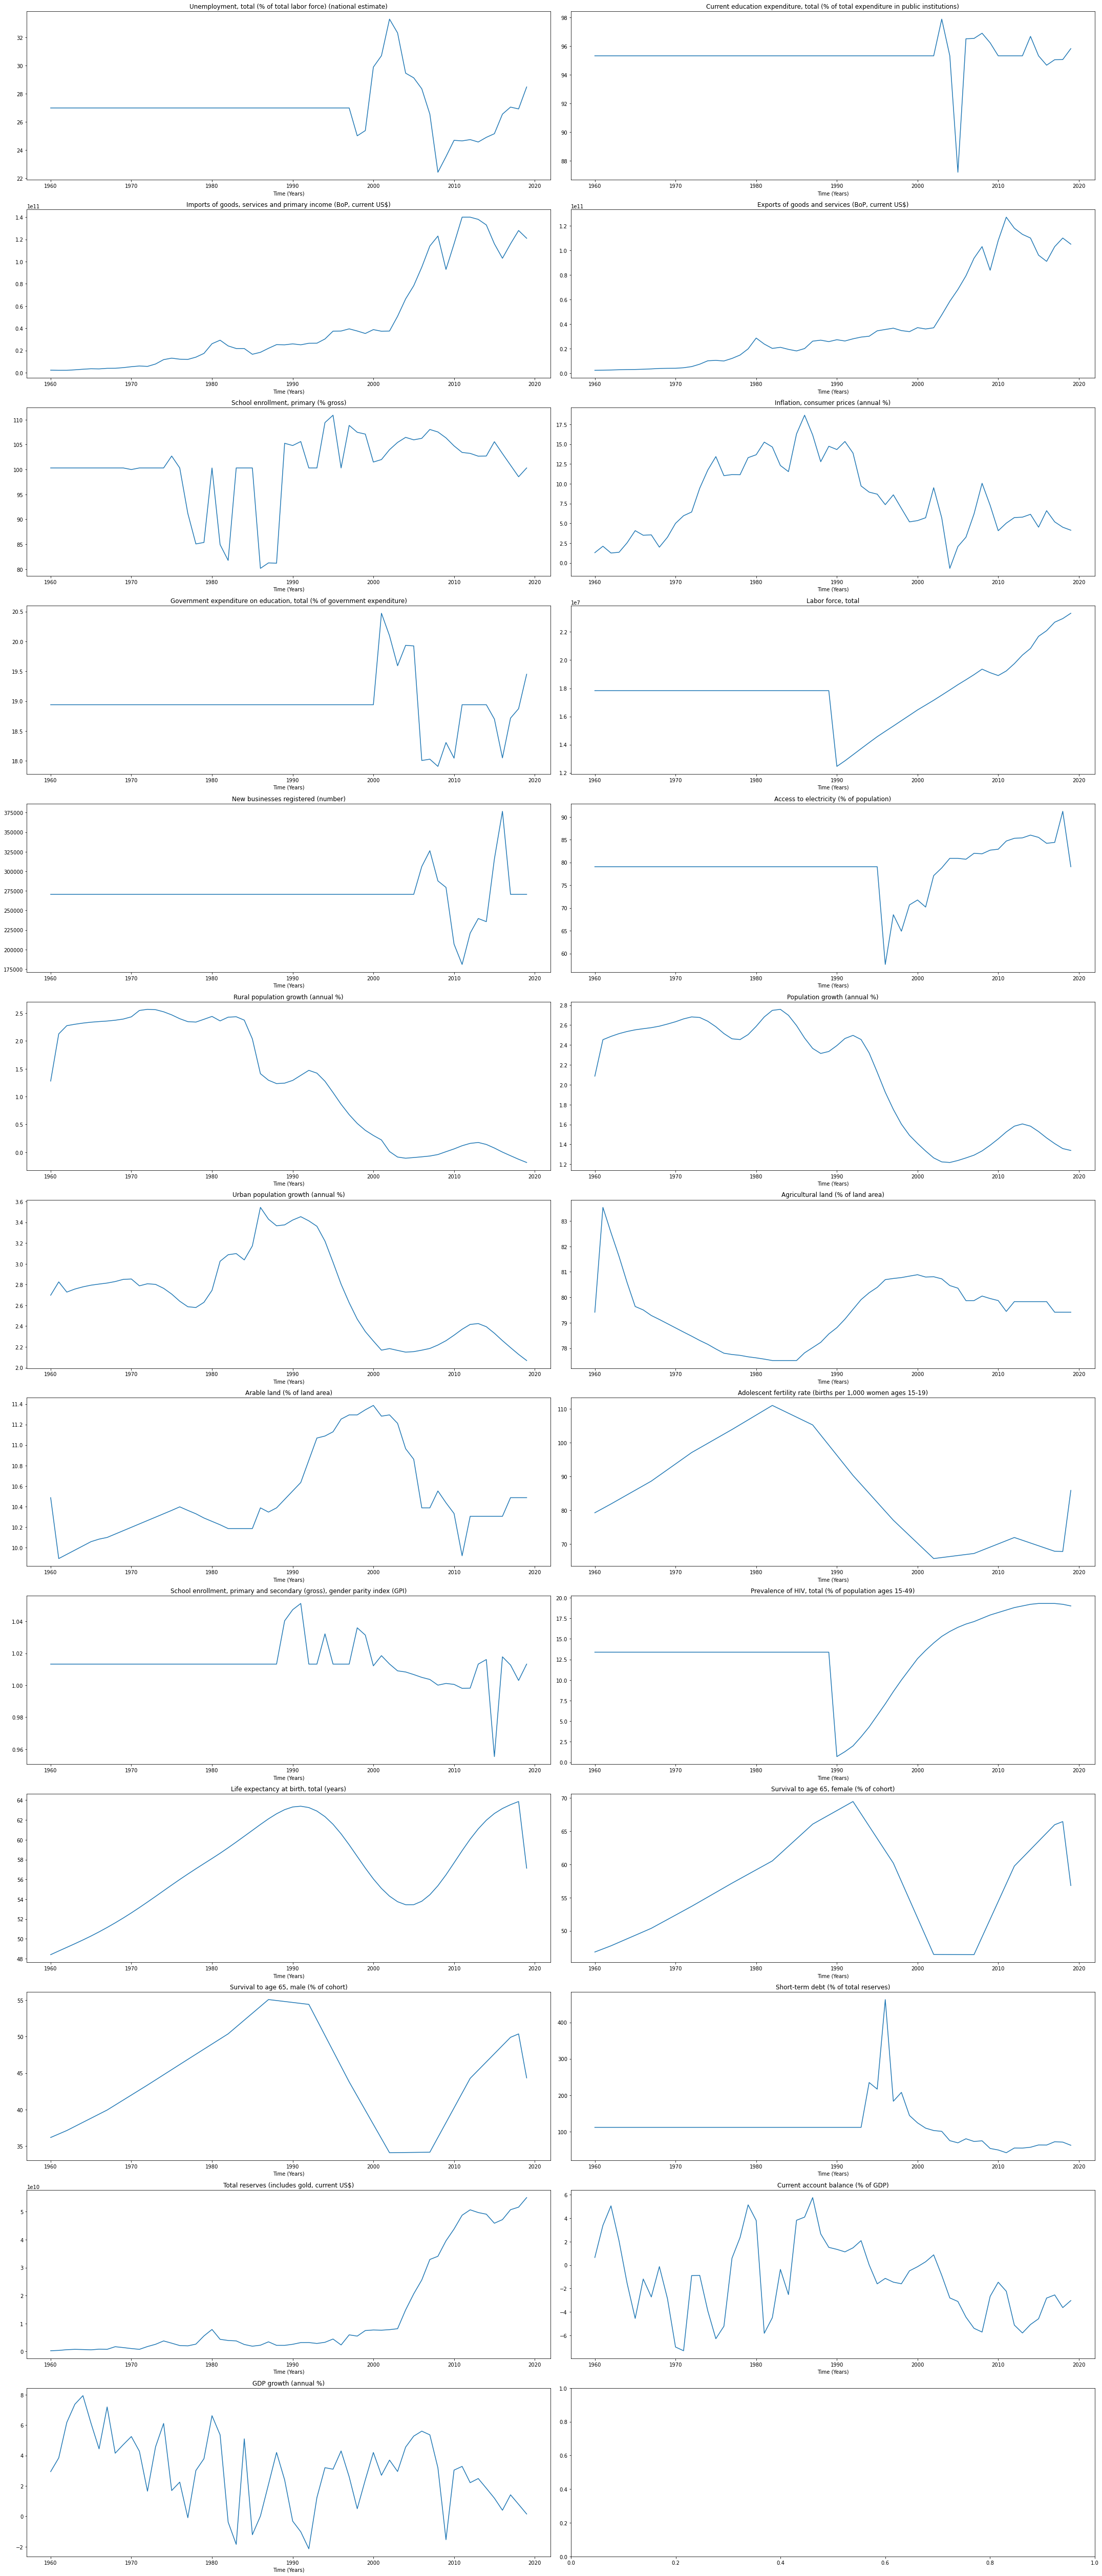

In [13]:
fig, axs = plt.subplots(13,2,figsize=(30,70))
count = 0
for j in range(13):
    for i in range(2):
        if(count>24):
            continue
        else:
            axs[j, i].plot(df_clean_v2.index,df_clean_v2[ind[count]])
            axs[j, i].set_title(ind[count])
            axs[j, i].set_xlabel("Time (Years)")
            #axs[j, i].set_ylabel(ind[count])
            count+=1
fig.tight_layout()
plt.show()

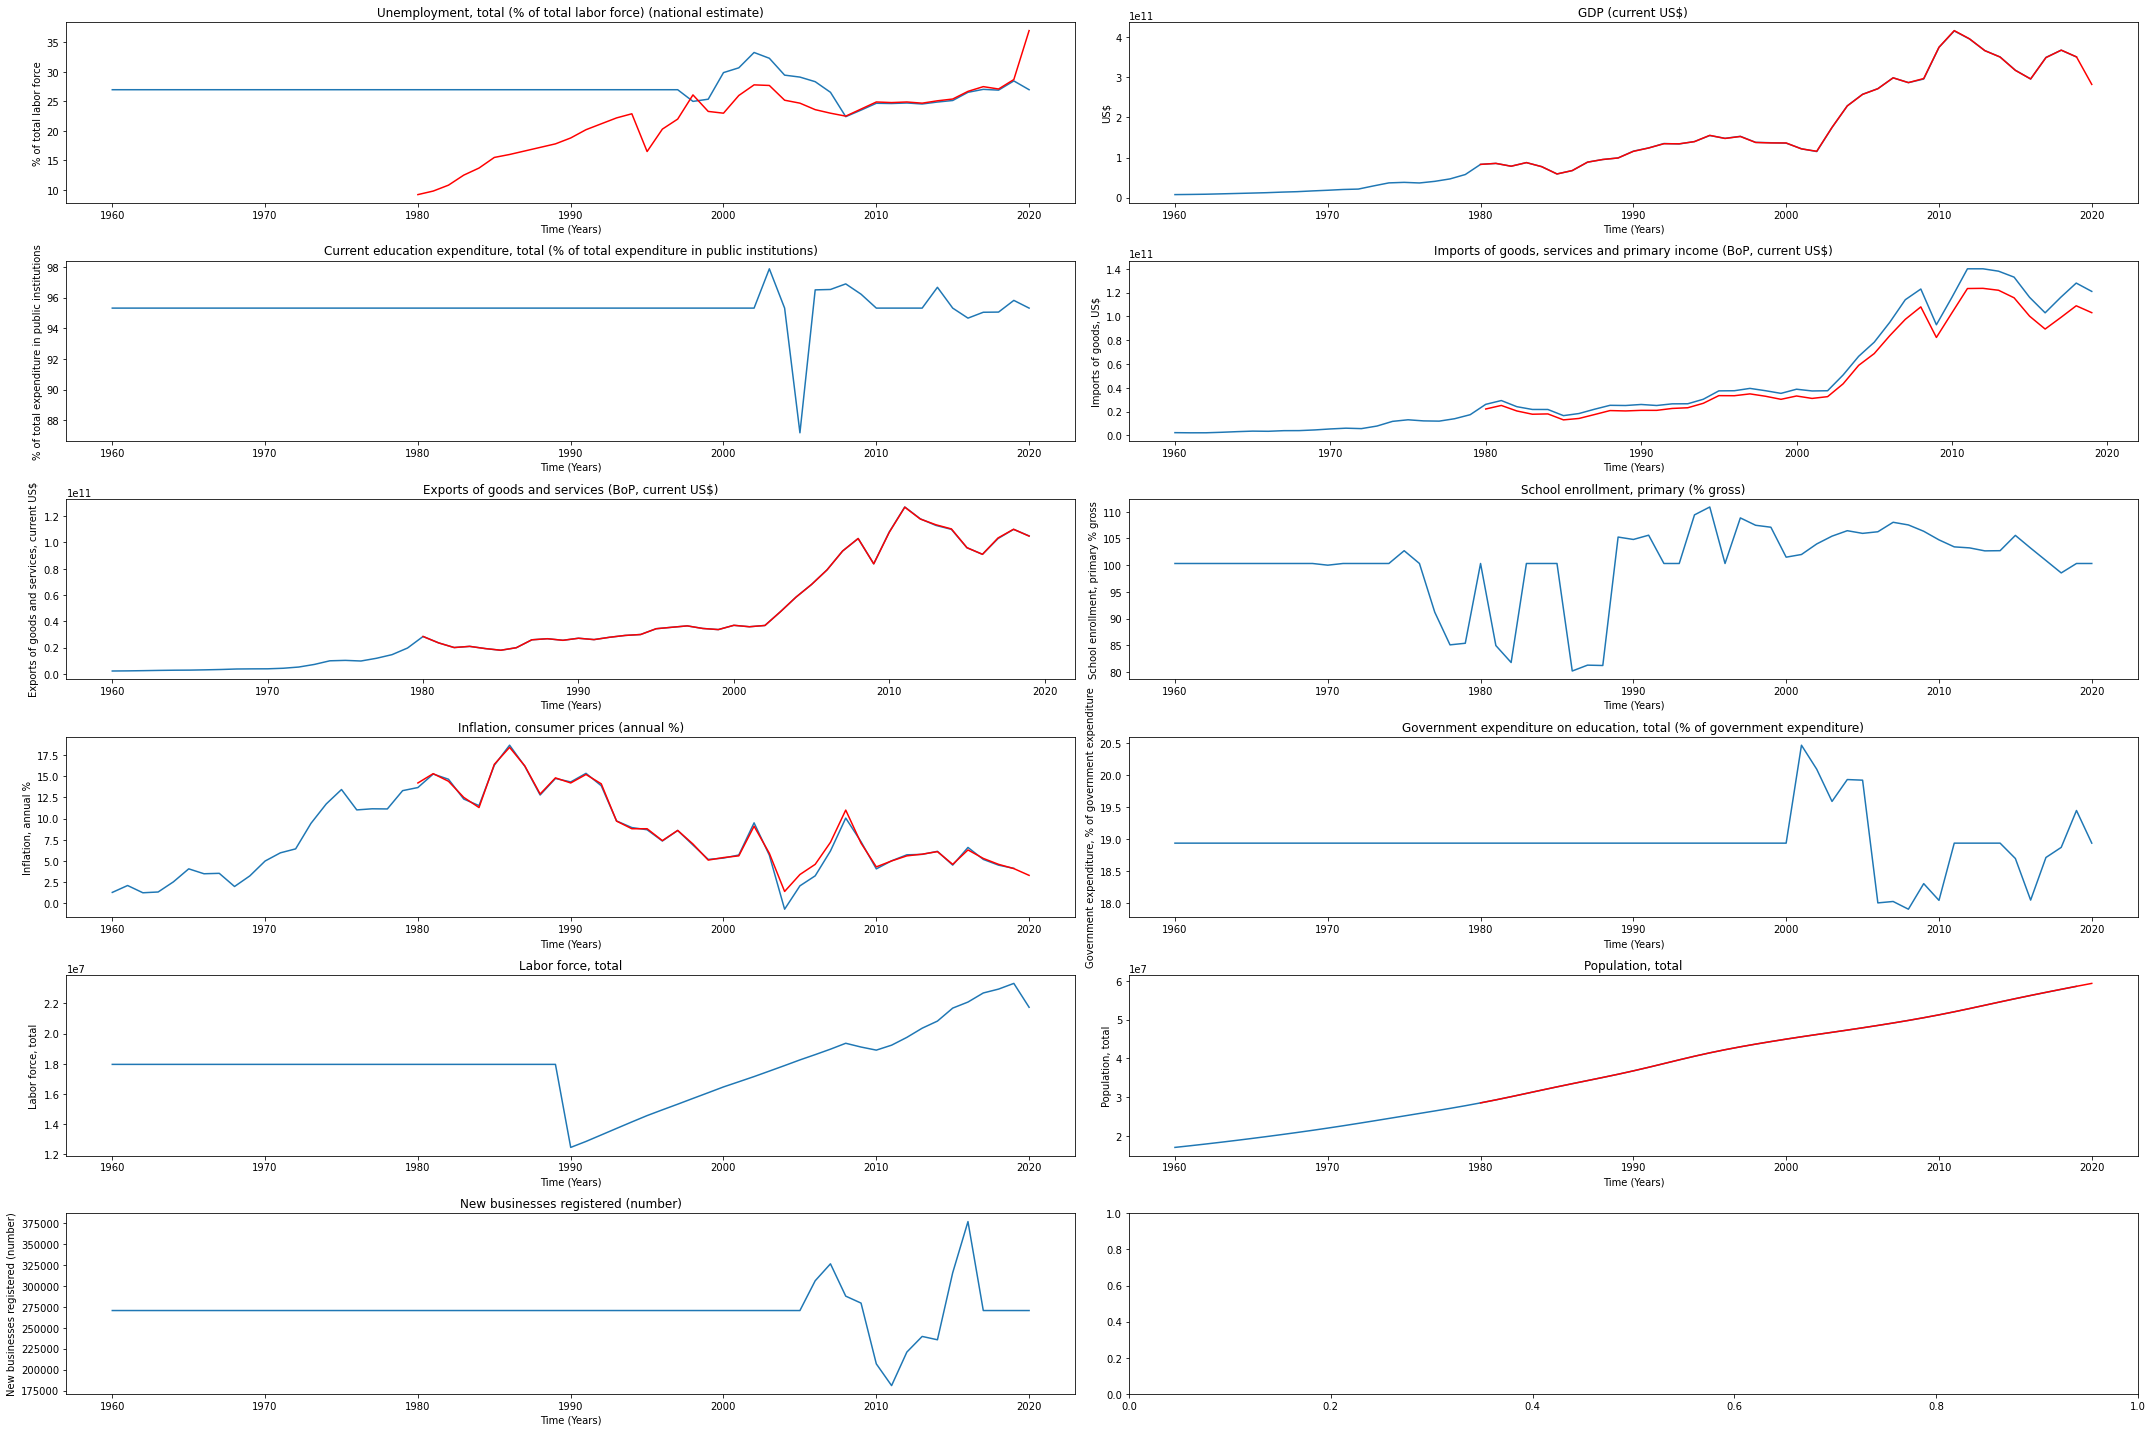

In [14]:
fig, axs = plt.subplots(6,2,figsize=(30,20))
axs[0, 0].plot(df_clean.index,df_clean['Unemployment, total (% of total labor force) (national estimate)'])
axs[0, 0].plot(df_validate.index,df_validate['Unemployment Rate'], c='r')
axs[0, 1].plot(df_clean.index,df_clean['GDP (current US$)'])
axs[0, 1].plot(df_validate.index,df_validate['GDP (Billion $)']*1000000000, c='r')
axs[1, 0].plot(df_clean.index,df_clean['Current education expenditure, total (% of total expenditure in public institutions)'])
axs[1, 1].plot(df_clean.index,df_clean['Imports of goods, services and primary income (BoP, current US$)'])
axs[1, 1].plot(df_validate.index,df_validate['Imports'], c='r')
axs[2, 0].plot(df_clean.index,df_clean['Exports of goods and services (BoP, current US$)'])
axs[2, 0].plot(df_validate.index,df_validate['Exports'], c='r')
axs[2, 1].plot(df_clean.index,df_clean['School enrollment, primary (% gross)'])
axs[3, 0].plot(df_clean.index,df_clean['Inflation, consumer prices (annual %)'])
axs[3, 0].plot(df_validate.index,df_validate['Inflation Rate'], c='r')
axs[3, 1].plot(df_clean.index,df_clean['Government expenditure on education, total (% of government expenditure)'])
axs[4, 0].plot(df_clean.index,df_clean['Labor force, total'])
axs[4, 1].plot(df_clean.index,df_clean['Population, total'])
axs[4, 1].plot(df_validate.index,df_validate['Population total'], c='r')
axs[5, 0].plot(df_clean.index,df_clean['New businesses registered (number)'])
axs[0, 0].set_title("Unemployment, total (% of total labor force) (national estimate)")
axs[0, 1].set_title("GDP (current US$)")
axs[1, 0].set_title("Current education expenditure, total (% of total expenditure in public institutions)")
axs[1, 1].set_title("Imports of goods, services and primary income (BoP, current US$)")
axs[2, 0].set_title("Exports of goods and services (BoP, current US$)")
axs[2, 1].set_title("School enrollment, primary (% gross)")
axs[3, 0].set_title("Inflation, consumer prices (annual %)")
axs[3, 1].set_title("Government expenditure on education, total (% of government expenditure)")
axs[4, 0].set_title("Labor force, total")
axs[4, 1].set_title("Population, total")
axs[5, 0].set_title("New businesses registered (number)")
axs[0, 0].set_xlabel("Time (Years)")
axs[0, 1].set_xlabel("Time (Years)")
axs[1, 0].set_xlabel("Time (Years)")
axs[1, 1].set_xlabel("Time (Years)")
axs[2, 0].set_xlabel("Time (Years)")
axs[2, 1].set_xlabel("Time (Years)")
axs[3, 0].set_xlabel("Time (Years)")
axs[3, 1].set_xlabel("Time (Years)")
axs[4, 0].set_xlabel("Time (Years)")
axs[4, 1].set_xlabel("Time (Years)")
axs[5, 0].set_xlabel("Time (Years)")
axs[0, 0].set_ylabel("% of total labor force")
axs[0, 1].set_ylabel("US$")
axs[1, 0].set_ylabel("% of total expenditure in public institutions")
axs[1, 1].set_ylabel("Imports of goods, US$")
axs[2, 0].set_ylabel("Exports of goods and services, current US$")
axs[2, 1].set_ylabel("School enrollment, primary % gross")
axs[3, 0].set_ylabel("Inflation, annual %")
axs[3, 1].set_ylabel("Government expenditure, % of government expenditure")
axs[4, 0].set_ylabel("Labor force, total")
axs[4, 1].set_ylabel("Population, total")
axs[5, 0].set_ylabel("New businesses registered (number)")

fig.tight_layout()
plt.show()

### <u>Analysis of Line Plots</u>

Through the method of using the mean to fill missing values, it can be seen that 5 features have a lot of years with missing values, mostly prior to the begin of the data capturing. 
- Unemployment, total (% of total labor force) (national estimate) began being captured from 1998, 
- Current education expenditure, total (% of total expenditure in public institutions) began in 2001, 
- Government expenditure on education, total (% of government expenditure) began in 2000, 
- Labor force, total began in 1989, and
- New businesses registered (number) began in 2005
A validation dataset was found from the external datasources ... As can be seen, the validation dataset is plotted in red, and confirms the accuracy of our intital dataset. We could not find external datasources to validate ..., and thus have excluded  them from our analysis.

##### Use a Correlation Matrix to understand the relationship between our features affecting the unemployment rate, and the unemployment rate. We however, do not use correlations to determine our indicators.

In [15]:
corr_matrix = df_clean_v2.corr()
display(corr_matrix.iloc[:,0])

Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        1.000000
Current education expenditure, total (% of total expenditure in public institutions)   -0.124187
Imports of goods, services and primary income (BoP, current US$)                       -0.316453
Exports of goods and services (BoP, current US$)                                       -0.303447
School enrollment, primary (% gross)                                                   -0.044169
Inflation, consumer prices (annual %)                                                  -0.057680
Government expenditure on education, total (% of government expenditure)                0.694577
Labor force, total                                                                     -0.179051
New businesses registered (number)                                                      0.162761
Access to electricity (% of population)                                                -0.245645
Rural populatio

Through scatter plot, the correlation matrix values are visulaised and verified. Each feature was plotted against the unemployment rate, and the following had a negative linear dependence with the unemployment rate.
- The GDP (current US), 
- Current education expenditure, total (% of total expenditure in public institutions), 
- Imports of goods, services and primary income (BoP, current US), 
- Exports of goods and services (BoP, current US), 
- School enrollment, primary (% gross), 
- Inflation, consumer prices (annual %),  
- Labor force, total, Population, total

Whereas the following had a positive linear dependence with unemployment rate.
- The New businesses registered (number), 
- Government expenditure on education, total (% of government expenditure)

This gives us more insight into how the indicators might affect the unemployment rate as their values are increased or decreased.

##### Due to the validation dataset for unemployment, we have decided to replace our initial unemployment data with the validation data. This is solely done, as it has more data and still verifies our initial dataset from 2008 onwards. Using actual data, instead of data that has been filled in from the mean, we expect it will give us more accurate results from an unbiased model

In [16]:
df_clean_new = df_clean_v2.copy()
df_clean_new.head()
df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] = df_validate['Unemployment Rate']
#df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] = np.where(df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] == 26.978637, df_validate['Unemployment Rate'], df_clean_new['Unemployment, total (% of total labor force) (national estimate)'])

##### Drop unvalidated data

In [17]:
df_clean_new.drop(df_clean_new.index[:20],inplace=True)
df_clean_new.drop(["Current education expenditure, total (% of total expenditure in public institutions)",
                                                 "Government expenditure on education, total (% of government expenditure)",
                                                 "Labor force, total",
                                                 "New businesses registered (number)"], axis = 1, inplace = True)

## <u>3.) Model Fitting</u>

In our investigation, we are trying to analyse the relationship between the response, the percentage of the population that is unemployed, and our chosen explanatory variables. We assume that the relationship between our explanatory variables and our response variable is linear, thus making linear regression a suitable technique to utilize. By describing the relationship in this way, we can attempt to find a model to describe the underlying distribution possibly generating our response data, from our explanatory variables.

In using multivariate linear regression model, we calculate the regression coefficients, which represent the relationship between our explanatory variables and our response variable. The variation in our response is however not completely described by our explanatory variables, there is generally an error involved due to sampling errors.

Potential sampling errors from the collection of our dataset are that some features are a national estimate based off of a census, which is never perfect and could be over or under-estimated. Another sampling error could be due to improved technology in more recent years, resulting in more accurate results.

These errors are deemed responsible for the random variation in our response, not explained by our explanatory variables. This error terms assumes a normal distribution for all points, which are also assumed to be independently and identically distributed. It is further assumed that our explanatory variables and the sampling errors are independent. Linear regression modeling is used to estimate the conditional mean of the response, given an explanatory variable. As will be shown below, our model may be deemed quite accurate as it explains a large portion of the variation in Y

By having a distribution of our response, as well as being able to completely explain all its variation, we are able to use our linear regression model to make inferences about the unemployment. Through the use of the statsmodels package, we use the fit method to fit a model to our data, and achieves this by first deriving sampling distributions for our regression estimators, which then get used to construct confidence intervals on which a number of hypothesis test are performed and included when using the summary method provided by the package.

##### Rename the columns for easier use in modelling

In [18]:
df_clean_new.rename(columns = {"Imports of goods, services and primary income (BoP, current US$)": "Imports",
                              "Exports of goods and services (BoP, current US$)": "Exports",
                              "Inflation, consumer prices (annual %)":"Inflation",
                              "Unemployment, total (% of total labor force) (national estimate)":"Unemployment",
                              "School enrollment, primary (% gross)": "S_Enrollment",
                               'Access to electricity (% of population)': 'Elec_Access',
                               'Rural population growth (annual %)': 'Rural_Pop_Growth',
                               'Population growth (annual %)' : 'Pop_Growth',
                               'Urban population growth (annual %)': 'Urban_Pop_Growth',
                               'Agricultural land (% of land area)' : 'Agriculture_Land',
                               'Arable land (% of land area)' : 'Arable_Land',
                               'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Adol_Fert_Rate',
                               'School enrollment, primary and secondary (gross), gender parity index (GPI)' : 'S_Enrollment_GPI',
                               'Prevalence of HIV, total (% of population ages 15-49)' : 'Prev_HIV',
                               'Life expectancy at birth, total (years)' : 'Life_Expectancy',
                               'Survival to age 65, female (% of cohort)' : 'Surv_female',
                               'Survival to age 65, male (% of cohort)' : 'Surv_male',
                               'Short-term debt (% of total reserves)' : 'ST_Debt',
                               'Total reserves (includes gold, current US$)' : 'Tot_Reserves',
                               'Current account balance (% of GDP)' : 'Current_Account_Balance',
                               'GDP growth (annual %)' : 'GDP_Growth'}, inplace = True)
df_clean_new.head(41)

index = df_clean_new.columns
#print(index)
for i in range(df_clean_new.shape[1]):
    df_clean_new[index[i]] = (df_clean_new[index[i]]-df_clean_new[index[i]].mean())/df_clean_new[index[i]].std()
    
df_clean_new.describe()

Indicator Name,Unemployment,Imports,Exports,S_Enrollment,Inflation,Elec_Access,Rural_Pop_Growth,Pop_Growth,Urban_Pop_Growth,Agriculture_Land,...,Adol_Fert_Rate,S_Enrollment_GPI,Prev_HIV,Life_Expectancy,Surv_female,Surv_male,ST_Debt,Tot_Reserves,Current_Account_Balance,GDP_Growth
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,-4.718448e-16,-3.885781e-17,-2.220446e-17,2.535125e-15,3.608225e-17,8.134999e-16,5.551115e-17,-3.330669e-16,3.663736e-16,7.698009e-15,...,1.172673e-16,-2.089088e-14,3.608225e-16,7.993606e-16,-2.206568e-16,-1.745826e-15,2.442491e-16,-6.106227e-17,-4.440892e-17,2.775558e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.329776e+00,-1.058872e+00,-1.063523e+00,-2.630293e+00,-2.033799e+00,-3.535854e+00,-1.069747e+00,-1.171530e+00,-1.195019e+00,-1.758641e+00,...,-1.021559e+00,-3.762408e+00,-2.325367e+00,-1.764425e+00,-1.697487e+00,-1.579261e+00,-9.622081e-01,-8.709935e-01,-1.491816e+00,-1.931810e+00
25%,-7.279364e-01,-8.449366e-01,-8.149780e-01,-1.161724e-01,-7.460863e-01,2.341931e-15,-8.499276e-01,-8.700030e-01,-9.109177e-01,-6.600846e-01,...,-8.473773e-01,-3.470706e-01,-2.032022e-01,-7.174281e-01,-7.084007e-01,-8.377870e-01,-5.672958e-01,-8.016352e-01,-6.390614e-01,-7.753011e-01
50%,2.862458e-01,-5.854911e-01,-5.629582e-01,2.460088e-01,-3.141506e-01,2.341931e-15,-4.612922e-01,-4.865850e-01,-4.963782e-01,3.088836e-01,...,-5.351132e-01,-2.883625e-14,3.256779e-16,1.621781e-01,2.242245e-01,2.074554e-01,1.964982e-16,-5.802598e-01,-7.467023e-02,9.604547e-02
75%,6.890752e-01,1.154570e+00,1.029761e+00,5.976295e-01,9.088193e-01,5.140749e-01,6.462263e-01,1.001557e+00,8.871789e-01,7.883977e-01,...,8.968258e-01,7.701588e-04,8.418378e-01,9.037519e-01,8.127674e-01,8.206498e-01,1.964982e-16,1.082934e+00,7.392746e-01,7.082956e-01
max,1.366776e+00,1.730905e+00,1.932826e+00,1.204741e+00,2.124231e+00,2.006307e+00,1.933159e+00,1.639173e+00,1.733871e+00,1.254290e+00,...,1.753714e+00,2.465365e+00,1.084764e+00,1.336783e+00,1.390650e+00,1.304724e+00,4.853330e+00,1.808809e+00,2.331062e+00,1.946044e+00


##### Create models for economic, health, and infrastructure issues

In [19]:
print(df_clean_new.columns)

Index(['Unemployment', 'Imports', 'Exports', 'S_Enrollment', 'Inflation',
       'Elec_Access', 'Rural_Pop_Growth', 'Pop_Growth', 'Urban_Pop_Growth',
       'Agriculture_Land', 'Arable_Land', 'Adol_Fert_Rate', 'S_Enrollment_GPI',
       'Prev_HIV', 'Life_Expectancy', 'Surv_female', 'Surv_male', 'ST_Debt',
       'Tot_Reserves', 'Current_Account_Balance', 'GDP_Growth'],
      dtype='object', name='Indicator Name')


In [20]:
df_infra = df_clean_new[["Unemployment", "Elec_Access", "Rural_Pop_Growth", "Pop_Growth", "Urban_Pop_Growth", "Agriculture_Land", "Arable_Land"]].copy()
df_health = df_clean_new[["Unemployment", "S_Enrollment", "Adol_Fert_Rate", "S_Enrollment_GPI", "Prev_HIV", "Life_Expectancy", "Surv_female", "Surv_male"]].copy()
df_economic = df_clean_new[["Unemployment", "ST_Debt", "Imports", "Exports", "Tot_Reserves", "Current_Account_Balance", "GDP_Growth", "Inflation"]].copy()

### <u>Collinarity Testing</u>
We use collinearity testing to investigate potential linear dependence between our explanatory variables. The problem in having redundant variables is that their solutions are highly unstable. We determine the multivariate collinearity by analysing the Variance inflation factor(VIF). The VIF is using the built in function, which runs auxiliary regressions of each predictor on the remaining ones. The R^2 is calculated for each, which is the used to determine the VIF for each explanatory variable. A high VIF indicates how much the variance of the coefficient estimator is inflated by. It is determined that GDP, Imports and Exports are highly colliniear, and we susequently remove them. After the first test, Exports has the highest VIF and was removed. After the second test, GDP has the highest VIF and was removed. 

In [21]:
def collinearity(data):
    """
    Data: pandas dataFrame with all the variables including the response variable
    
    return : variable names that are not collinear
    """
    exp_variables = data.drop(['Unemployment'] ,axis = 1)
    variables = exp_variables.columns
    indexes = np.arange(exp_variables.shape[1])
    while True:
        records = exp_variables[variables[indexes]].values
        vif = []
        for i in np.arange(records.shape[1]):
            vif.append(variance_inflation_factor(records,i))
        maxVif = max(vif)
        if maxVif >10:
            maxVifIdx = vif.index(maxVif)
            cul = variables[indexes]
            print(cul[maxVifIdx],"   : dropped")
            indexes = np.delete(indexes,maxVifIdx)
        else:
            break
    return variables[indexes]

In [22]:
independent = collinearity(df_clean_new)
#print(independent)

Pop_Growth    : dropped
Surv_male    : dropped
Exports    : dropped
Surv_female    : dropped
Tot_Reserves    : dropped
Agriculture_Land    : dropped
Adol_Fert_Rate    : dropped
Imports    : dropped
Urban_Pop_Growth    : dropped


In [23]:
infrastructure = collinearity(df_infra)
print(infrastructure)

Pop_Growth    : dropped
Agriculture_Land    : dropped
Index(['Elec_Access', 'Rural_Pop_Growth', 'Urban_Pop_Growth', 'Arable_Land'], dtype='object', name='Indicator Name')


In [24]:
health = collinearity(df_health)
print(health)

Surv_male    : dropped
Surv_female    : dropped
Index(['S_Enrollment', 'Adol_Fert_Rate', 'S_Enrollment_GPI', 'Prev_HIV',
       'Life_Expectancy'],
      dtype='object', name='Indicator Name')


In [25]:
economic = collinearity(df_economic)
print(economic)

Imports    : dropped
Exports    : dropped
Index(['ST_Debt', 'Tot_Reserves', 'Current_Account_Balance', 'GDP_Growth',
       'Inflation'],
      dtype='object', name='Indicator Name')


### VIF Full Model

In [140]:
X = df_clean_new.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Exports','Pop_Growth','Rural_Pop_Growth','Surv_female', 'Surv_male', 'Tot_Reserves'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
                    Feature          VIF
0                   Imports   535.270170
1                   Exports   575.733482
2              S_Enrollment     4.002952
3                 Inflation     9.180573
4               Elec_Access    12.757863
5          Rural_Pop_Growth  3115.338251
6                Pop_Growth  5434.769154
7          Urban_Pop_Growth   890.847523
8          Agriculture_Land   224.217420
9               Arable_Land    43.969405
10           Adol_Fert_Rate   222.506093
11         S_Enrollment_GPI     2.304241
12                 Prev_HIV    14.137597
13          Life_Expectancy   347.926585
14              Surv_female  1385.029449
15                Surv_male  2518.357625
16                  ST_Debt     6.964980
17             Tot_Reserves   239.211198
18  Current_Account_Balance    10.239855
19               GDP_Growth     2.656799


VIF after dropping
                    Feature        VIF
0                   Imports  19.514804
1              S_Enr

### VIF Infrastructure Model

In [141]:
X = df_infra.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Pop_Growth'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
            Feature         VIF
0       Elec_Access    2.707730
1  Rural_Pop_Growth  105.227305
2        Pop_Growth  199.959459
3  Urban_Pop_Growth   34.507495
4  Agriculture_Land   13.343112
5       Arable_Land    8.382643


VIF after dropping
            Feature        VIF
0       Elec_Access   2.408360
1  Rural_Pop_Growth   7.779302
2  Urban_Pop_Growth   3.061123
3  Agriculture_Land  11.698975
4       Arable_Land   6.408134


### VIF Health Model

In [142]:
X = df_health.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Surv_male', 'Surv_female'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
            Feature         VIF
0      S_Enrollment    2.194162
1    Adol_Fert_Rate   33.001962
2  S_Enrollment_GPI    1.656869
3          Prev_HIV    2.755630
4   Life_Expectancy  124.680255
5       Surv_female  166.766487
6         Surv_male  199.175207


VIF after dropping
            Feature       VIF
0      S_Enrollment  2.065014
1    Adol_Fert_Rate  2.531956
2  S_Enrollment_GPI  1.612278
3          Prev_HIV  1.942481
4   Life_Expectancy  1.281781


### VIF Economic Model

In [143]:
X = df_economic.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Exports'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
                   Feature         VIF
0                  ST_Debt    1.516665
1                  Imports  418.565952
2                  Exports  389.135161
3             Tot_Reserves   26.771347
4  Current_Account_Balance    5.149912
5               GDP_Growth    1.466174
6                Inflation    2.449324


VIF after dropping
                   Feature        VIF
0                  ST_Debt   1.509708
1                  Imports  29.584816
2             Tot_Reserves  26.033161
3  Current_Account_Balance   2.294296
4               GDP_Growth   1.464971
5                Inflation   2.178759


## <u>Split Dataset into Training and Testing Data</u>
We split our data into a training and testing dataset in order to prevent an exaggerated true accuracy of our model. Both sets consist of 5 features, while the training dataset has 32 years of data, and the testing dataset has 8.

Full Split

In [144]:
np.random.seed(30)
df_shuffle = df_clean_new.copy().reset_index(drop=True)
df_shuffle.drop(['Exports','Pop_Growth','Rural_Pop_Growth','Surv_female', 'Surv_male', 'Tot_Reserves'],axis=1, inplace=True)
df_shuffle = df_shuffle.sample(frac=1).reset_index(drop=True)

df_train = df_shuffle.iloc[:round(.8*len(df_shuffle))]
df_test = df_shuffle.iloc[round(.8*len(df_shuffle)):]
print("Training dataset size:", df_train.shape)
print("Testing dataset size:", df_test.shape)

Training dataset size: (32, 15)
Testing dataset size: (8, 15)


Infrastructure Split

In [145]:
np.random.seed(30)
df_shuffle_infra = df_infra.copy().reset_index(drop=True)
df_shuffle_infra.drop(['Pop_Growth'],axis=1, inplace=True)
df_shuffle_infra = df_shuffle_infra.sample(frac=1).reset_index(drop=True)

df_train_infra = df_shuffle_infra.iloc[:round(.8*len(df_shuffle_infra))]
df_test_infra = df_shuffle_infra.iloc[round(.8*len(df_shuffle_infra)):]
#print("Training dataset size:", df_train_infra.shape)
#print("Testing dataset size:", df_test_infra.shape)

Health Split

In [146]:
np.random.seed(30)
df_shuffle_health = df_health.copy().reset_index(drop=True)
df_shuffle_health.drop(['Surv_male', 'Surv_female'],axis=1, inplace=True)
df_shuffle_health = df_shuffle_health.sample(frac=1).reset_index(drop=True)

df_train_health = df_shuffle_health.iloc[:round(.8*len(df_shuffle_health))]
df_test_health = df_shuffle_health.iloc[round(.8*len(df_shuffle_health)):]
#print("Training dataset size:", df_train_health.shape)
#print("Testing dataset size:", df_train_health.shape)

Economic Split

In [147]:
np.random.seed(30)
df_shuffle_eco = df_economic.copy().reset_index(drop=True)
df_shuffle_eco.drop(['Exports'],axis=1, inplace=True)
df_shuffle_eco = df_shuffle_eco.sample(frac=1).reset_index(drop=True)

df_train_eco = df_shuffle_eco.iloc[:round(.8*len(df_shuffle_eco))]
df_test_eco = df_shuffle_eco.iloc[round(.8*len(df_shuffle_eco)):]
#print("Training dataset size:", df_train_eco.shape)
#print("Testing dataset size:", df_test_eco.shape)

##### We fit our initial model of the dataset, with all the features that were validated, and remain after collinearity testing.

Initial Full Model

In [148]:
model_initial = smf.ols('Unemployment ~ Imports + Inflation + S_Enrollment + Elec_Access + Urban_Pop_Growth + Arable_Land + Adol_Fert_Rate + S_Enrollment_GPI + Prev_HIV + Life_Expectancy  + ST_Debt + Current_Account_Balance + GDP_Growth', df_train).fit()
print(model_initial.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     20.40
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.92e-08
Time:                        20:29:21   Log-Likelihood:                 1.6818
No. Observations:                  32   AIC:                             24.64
Df Residuals:                      18   BIC:                             45.16
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Initial Infrastructure Model

In [149]:
model_init_infra = smf.ols('Unemployment ~ Elec_Access + Urban_Pop_Growth + Rural_Pop_Growth + Arable_Land', df_train_infra).fit()
print(model_init_infra.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     38.90
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           7.76e-11
Time:                        20:29:27   Log-Likelihood:                -11.828
No. Observations:                  32   AIC:                             33.66
Df Residuals:                      27   BIC:                             40.98
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0339      0.068  

Initial Health Model

In [150]:
model_init_health = smf.ols('Unemployment ~ S_Enrollment + Adol_Fert_Rate + S_Enrollment_GPI + Prev_HIV + Life_Expectancy', df_train_health).fit()
print(model_init_health.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     42.00
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.21e-11
Time:                        20:29:28   Log-Likelihood:                -7.1183
No. Observations:                  32   AIC:                             26.24
Df Residuals:                      26   BIC:                             35.03
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0652      0.060  

Initial Economic Model

In [151]:
model_init_eco = smf.ols('Unemployment ~ ST_Debt + Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation + Imports', df_train_eco).fit()
print(model_init_eco.summary())
print(df_train_eco.columns)

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.66e-07
Time:                        20:29:28   Log-Likelihood:                -17.102
No. Observations:                  32   AIC:                             48.20
Df Residuals:                      25   BIC:                             58.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [152]:
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
            print(formula)
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [153]:
import itertools
def combinations(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    
    all_combinations = []
    for r in range(len(remaining) + 1):
        combinations_object = itertools.combinations(remaining, r)
        combinations_list = list(combinations_object)
        all_combinations += combinations_list
        
    for i in range(1,len(all_combinations)):
    
        formula = "{} ~ {} + 1".format(response,' + '.join(all_combinations[i]))
        score = smf.ols(formula, data).fit().rsquared_adj
        selected.append((score, all_combinations[i]))
    return selected

### Full Improved Model

In [154]:
all_combs = combinations(df_train,'Unemployment')
#print(all_combs_eco)

In [155]:
df_score = pd.DataFrame(data = all_combs,columns = ['Adj R-Squared', 'Combination'])
max_score = df_score[df_score['Adj R-Squared']==df_score['Adj R-Squared'].max()]
a = np.array(max_score['Combination'])
print(a)
print(max_score['Adj R-Squared'].iloc[0])

[('Arable_Land', 'Life_Expectancy', 'Adol_Fert_Rate', 'ST_Debt', 'Elec_Access', 'Urban_Pop_Growth', 'Agriculture_Land')]
0.9148698560612054


In [156]:
model_impr = smf.ols('Unemployment ~ Arable_Land + Life_Expectancy + Adol_Fert_Rate + ST_Debt + Elec_Access + Urban_Pop_Growth + Agriculture_Land -1', df_train).fit()
print(model_impr.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              46.32
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    9.39e-13
Time:                        20:33:09   Log-Likelihood:                        -0.23797
No. Observations:                  32   AIC:                                      14.48
Df Residuals:                      25   BIC:                                      24.74
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Infrastructure Improved Model

In [85]:
all_combs_infra = combinations(df_train_infra,'Unemployment')
#print(all_combs_eco)

In [86]:
df_score_infra = pd.DataFrame(data = all_combs_infra,columns = ['Adj R-Squared', 'Combination'])
max_score_infra = df_score_infra[df_score_infra['Adj R-Squared']==df_score_infra['Adj R-Squared'].max()]
a_infra = np.array(max_score_infra['Combination'])
print(a_infra)
print(max_score_infra['Adj R-Squared'].iloc[0])

[('Rural_Pop_Growth', 'Elec_Access', 'Urban_Pop_Growth', 'Agriculture_Land')]
0.8411111350628231


In [119]:
model_impr_infra = smf.ols('Unemployment ~ Rural_Pop_Growth + Elec_Access + Urban_Pop_Growth + Agriculture_Land -1', df_train_infra).fit()
print(model_impr_infra.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              42.69
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    1.58e-11
Time:                        20:20:37   Log-Likelihood:                         -11.069
No. Observations:                  32   AIC:                                      30.14
Df Residuals:                      28   BIC:                                      36.00
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Health Improved Model

In [88]:
all_combs_health = combinations(df_train_health,'Unemployment')
#print(all_combs_eco)

In [89]:
df_score_health = pd.DataFrame(data = all_combs_health,columns = ['Adj R-Squared', 'Combination'])
max_score_health = df_score_health[df_score_health['Adj R-Squared']==df_score_health['Adj R-Squared'].max()]
a_health = np.array(max_score_health['Combination'])
print(a_health)
print(max_score_health['Adj R-Squared'].iloc[0])

[('S_Enrollment', 'Life_Expectancy', 'S_Enrollment_GPI', 'Adol_Fert_Rate')]
0.8733240112052241


In [90]:
model_impr_health = smf.ols('Unemployment ~ S_Enrollment + Life_Expectancy + S_Enrollment_GPI + Adol_Fert_Rate -1', df_train_health).fit()
print(model_impr_health.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              53.76
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    9.71e-13
Time:                        19:17:32   Log-Likelihood:                         -7.8513
No. Observations:                  32   AIC:                                      23.70
Df Residuals:                      28   BIC:                                      29.57
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Economics Improved Model

In [91]:
all_combs_eco = combinations(df_train_eco,'Unemployment')
#print(all_combs_eco)

In [92]:
df_score = pd.DataFrame(data = all_combs_eco,columns = ['Adj R-Squared', 'Combination'])
max_score = df_score[df_score['Adj R-Squared']==df_score['Adj R-Squared'].max()]
a = np.array(max_score['Combination'])
print(a)
print(max_score['Adj R-Squared'].iloc[0])

[('Current_Account_Balance', 'Inflation', 'Imports', 'Tot_Reserves', 'GDP_Growth')]
0.754040011386701


In [93]:
model_impr_eco = smf.ols('Unemployment ~ Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation + Imports -1', df_train_eco).fit()
print(model_impr_eco.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              20.61
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    1.87e-08
Time:                        19:17:34   Log-Likelihood:                         -17.273
No. Observations:                  32   AIC:                                      44.55
Df Residuals:                      27   BIC:                                      51.88
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

When trying to find the best model, we fully explore our dataset by using forward selected step-wise regression to analyse different combinations of our explanatory variables. Forward selected step-wise regression starts with the intercept only model, and recursively adds one variable at a time, while measuring its performance and selecting the best one. The order in which the variables and their influence are examined is shown below.

In [21]:
model = forward_selected(df_train, 'Unemployment')

Unemployment ~ Population + 1
Unemployment ~ Inflation + 1
Unemployment ~ Imports + 1
Unemployment ~ S_Enrollment + 1
Unemployment ~ Population + Inflation + 1
Unemployment ~ Population + Imports + 1
Unemployment ~ Population + S_Enrollment + 1
Unemployment ~ Population + Imports + Inflation + 1
Unemployment ~ Population + Imports + S_Enrollment + 1


It is determined that school enrollment, population number, and the imports of goods and services are the best combination for improving our prediction accuracy. Using these explanatory variables, our model is fitted to the data within the forward selection, and the diagnostics are shown below.

In [45]:
from sklearn import linear_model
model_lasso_eco = linear_model.Lasso('Unemployment ~ ST_Debt + Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation', df_train_eco).fit()
print(model_lasso_eco.summary())

C:\Users\mike9\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=Indicator Name  Unemployment       ST_Debt   Imports   Exports  Tot_Reserves  \
0                  -0.699501  1.964982e-16 -0.866512 -0.855622     -0.855990   
1                   0.854946 -2.990638e-02 -0.590081 -0.571925     -0.582155   
2                  -1.135505  1.964982e-16 -1.058872 -1.063523     -0.870993   
3                   0.343116  4.501337e-01 -0.635824 -0.631457     -0.588718   
4                   0.627466 -9.622081e-01  1.730905  1.932826      1.490833   
5                  -0.813241  1.964982e-16 -0.862816 -0.822446     -0.855546   
6                   0.286246 -5.347160e-01  1.143269  1.012527      0.692878   
7                  -0.945938  1.451879e+00 -0.588315 -0.613357     -0.741622   
8                  -0.509935  1.964982e-16 -0.846884 -0.812489     -0.836424   
9                   0.418943 -8.014459e-01  0.667903  0.743756      1.029789   
10         

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### <u>Influence and Outlier Detection</u>
We use a residual vs leverage plot to initially visually detect any potential outliers. Thereafter we use the influence_plot method provided in the statsmodels package to verify these outliers. We use Cooks distance metric  with a threshhold of 0.1 to confirm that what was seen visually, are actually outliers. Finally, these observations are removed from the dataset for improved accuracy.

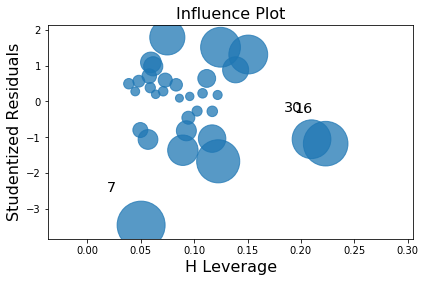

In [22]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

##### The outliers to be removed

In [23]:
df_outlier = model.get_influence().summary_frame()
display(df_outlier[df_outlier['cooks_d'] > 0.1])

,dfb_Intercept,dfb_Population,dfb_Imports,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,-0.655961,-0.275617,0.440377,0.153824,-2.949979,0.050358,-0.679318,-3.464777,-0.797865
16,-0.241705,0.547815,-0.371030,0.132294,-1.175359,0.223174,-0.629986,-1.183449,-0.634321
19,0.304050,0.459940,-0.491304,0.104597,1.483960,0.124721,0.560169,1.516880,0.572596
31,-0.307100,-0.472645,0.281401,0.123294,-1.627484,0.122535,-0.608180,-1.677625,-0.626917


In [24]:
drop_arr = df_outlier[df_outlier['cooks_d']>0.1].index
df_train.drop(index = drop_arr, inplace = True)
#display(df_train)

C:\Users\Nicholas\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### <u>4. Hypothesis Testing:</u>

In [25]:
model_final = forward_selected(df_train, 'Unemployment')
print(model_final.summary())

Unemployment ~ Population + 1
Unemployment ~ Inflation + 1
Unemployment ~ Imports + 1
Unemployment ~ S_Enrollment + 1
Unemployment ~ Population + Inflation + 1
Unemployment ~ Population + Imports + 1
Unemployment ~ Population + S_Enrollment + 1
Unemployment ~ Population + Imports + Inflation + 1
Unemployment ~ Population + Imports + S_Enrollment + 1
Unemployment ~ Population + Imports + S_Enrollment + Inflation + 1
                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     98.72
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.22e-13
Time:                        16:37:43   Log-Likelihood:                 2.9685
No. Observations:                  28   AIC:                             2.063
Df Residuals:               

In the hypothesis testing, we aim to determine the influence of each of the x variables on the y variable. We do this by using the training data as a sample to infer what is happening in the whole population. In order to confirm the coefficients of each of the x variables are a true representation of the population and not just from sampling variation, we have to perform some tests.

In our test, we have our null hypothesis which is:
- $H_0: \beta_i = 0$ where $\beta_i$ is the coefficient of the $x_i$ variable

And our alternative hypothesis which is:
- $H_1: \beta_i \neq 0$

From the model that is generated from Statsmodels, the coefficients ($\beta_i$) of the x variables are divided by the standard error to achieve the t-statistic for each variable. This is because the sampling distribution of the t-statistic (also called the t-distribution) under the null hypothesis will have a mean of 0 because as the number of samples tends to infinity, the t distribution tends to a normal distrubution. 

The P-Value of the variable is the probability that the coefficient for the variable was created due to sampling error. The P-value is created by measuring the magnitude of the t-statistic and calculating the probability that the magnitude is greater than the critical value of the t-statistic. Since we use the absolute value of the t-statistic, a probability smaller than 0.05, will result in coefficients being able to be positive or negative, indicating their linear relationship with the model. We choose a confidence interval of 0.1, to be able to model the unemployment rate with 3 explanatory variables as opposed to 2 as with more data we can more accurately represent the real-world model. If the P-value is lower than 0.1, we can successfully reject the null hypothesis, confirming that this variable's coefficient had less than a 5% chance of being true under the null hypothesis.

After conducting the test, the results are as follows:

##### Population: 

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis

##### Imports:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis

##### School Enrollment:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.085, fail to reject null hypothesis


#### Assumptions:
- There exist a linear relationship between our explanatory variables, x, and the response variable, y.
- The residuals are independent.

#### Appropriateness:
- We appropriately removed any collinear variables
- We plotted the residuals of our model against the fitted values to show independece

In [26]:
final_model = smf.ols('Unemployment ~ Population + Imports', df_train).fit()
#print(final_model.summary())

### <u>Risidual Analysis</u>
We want to ensure that residuals are randomly scattered for each explanatory variable.
Residuals appear to be uncorrelated to predictors. Any potential patterns can be attributed to sampling variation.

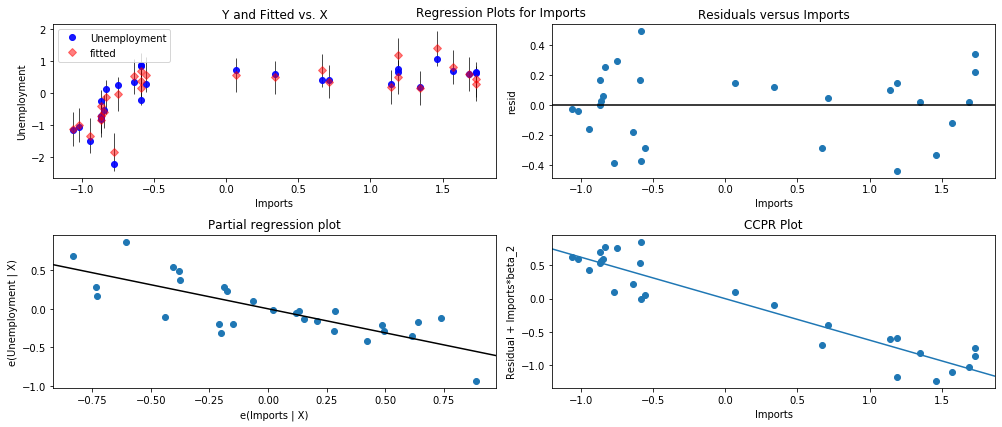

In [27]:
plt.rc("figure", figsize=(14,6))
fig = sm.graphics.plot_regress_exog(final_model, "Imports")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

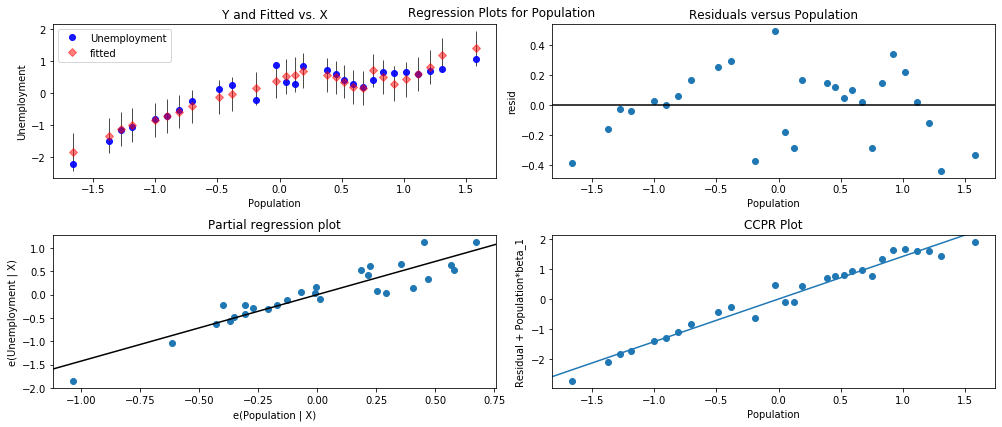

In [28]:
fig = sm.graphics.plot_regress_exog(final_model, "Population")
fig.tight_layout(pad=1.0)

In the above residual vs population plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

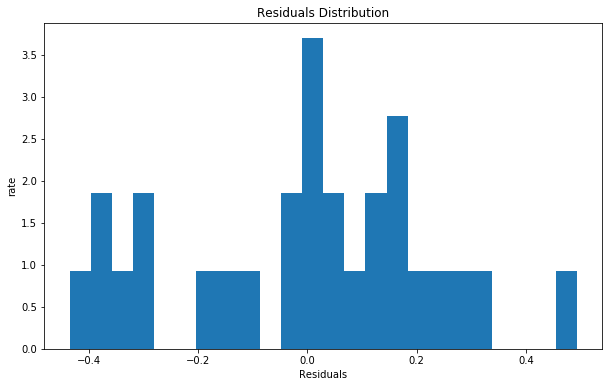

In [29]:
#plot the distribution of residuals
def plot_residuals(model):
    resid = pd.DataFrame(model.resid,columns = ['error'])
    plt.figure(figsize = (10,6))
    plt.hist(resid['error'],bins=24,density=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('rate')
    plt.show()
plot_residuals(final_model)

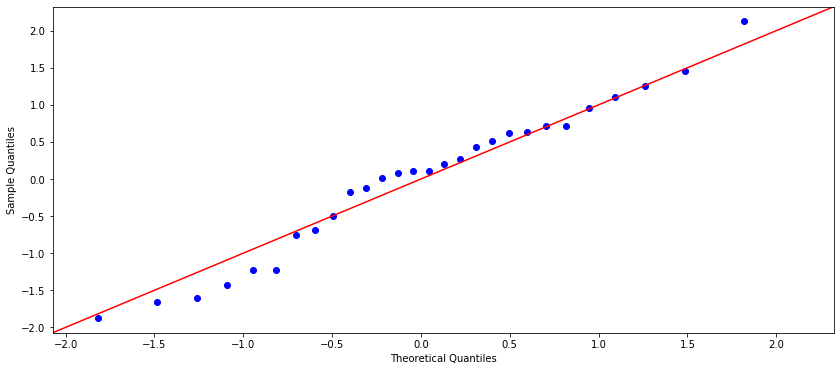

In [30]:
residuals = pd.DataFrame(final_model.resid,columns = ['error'])
value = np.array(residuals.values).ravel()
sm.qqplot(value,fit=True, line='45')
plt.show()

From the QQ-plot of the residuals above we can see that residuals are not normally distributed. The QQ-plot also shows something we did not observe in the distribution plot. Residuals slightly deviate from the normal distribution at the beginning and the end (tails) of the plot. This is what we expected because the residuals have a kurtosis of 2.38 as observed in the summary of model_final. From this, we can conclude that residuals are normally distributed so the normality test does pass. This means we can proceed with the F test.

##### Predicting on the test set using our final model above.



Mean Squared Error:  0.08575586111628612


Predictions:
32   -0.921849
33   -1.455058
34    0.241292
35   -1.624727
36    0.687673
37   -0.275944
38    1.620026
39    1.437673
dtype: float64


Actual y values:
32   -0.926981
33   -1.704205
34    0.096679
35   -2.026469
36    1.177210
37   -0.054974
38    1.366776
39    1.139296
Name: Unemployment, dtype: float64


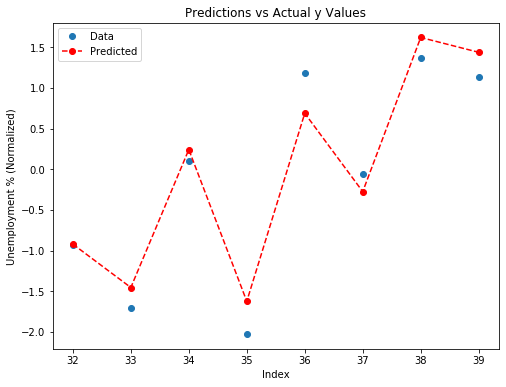

In [31]:
y_hat = final_model.predict(df_test)
mse = 1/len(y_hat)*np.sum(np.square(y_hat - df_test['Unemployment']))
print('\n')
print('Mean Squared Error: ',mse)
print('\n')
print("Predictions:")
print(y_hat)
print('\n')
print('Actual y values:')
print(df_test['Unemployment'])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_test.index, df_test['Unemployment'], 'o', label="Data")
ax.plot(df_test.index, y_hat, 'r--o', label="Predicted")
legend = ax.legend(loc="best")
plt.title('Predictions vs Actual y Values')
plt.ylabel('Unemployment % (Normalized)')
plt.xlabel('Index')
plt.show()

### <u>5. Interpretation of Results:</u>

In [32]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     134.2
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.26e-14
Time:                        16:37:45   Log-Likelihood:                 1.1789
No. Observations:                  28   AIC:                             3.642
Df Residuals:                      25   BIC:                             7.639
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0529      0.047      1.131      0.2

#### <u>Interpretation of Model Diagnostics</u>
The R-squared, a measurement of how much the change in the unemployment rate is caused by the changes in population size, imports of goods and services, and the inflation rate. From our initial model, this value has increased from 88.9% to 91.5% indicating that our model tuning has resulted in a better model fit. We can see that, due to the difference between R-sqaured and Adjusted R-squared, and the increase in values from our initial model to this model, we can conclude that our chosen independent variables do contribute to explaing the change in unemployment rate.

The F-statistic determines if your group of explanatory variables are statistically significant by comparing the produced model to one where the effect of the variables is changed to 0. The probability of the F-statistic tells us the accuracy of the null hypothesis, where the effect of the variables has been set to 0. In our case, it tell us that there is a 4.26e-24 chance of the null hypothesis being true. Thus we can reject the null hypothesis and conclude that our chosen explanatory variables are statistically significant.

The omnibus and Jarque-Bera are used to describe the normalcy of the distribution of our residuals using skew and kurtosis measurements.  The closer the probability of these variables is to 1, the more likely it is to indicate a normal distribution. With values of 80% and 75% respectively, we can conclude that our residuals are approximately normally distributed, thereby also satisfying our initial assumptions.

The Durbin-Watson measures how evenly distributed our errors are throughout the data. With a value of 1.961, we can conclude that our model is homoscedastic and the relative error doesn't go higher as the data points go higher.

Condition number is a measure of the sensitivity within our model. We have a low condition number as we have normalized our data and our model is thus not overly sensitive to changes in the size of the dataset.

#### <u>Interpretation of Model Results vs Expected Results</u>
As described in the hypothesis testing section, population and imports are our significant explanatory variables. Due to the high collinearity between imports, exports and GDP, we can conclude that exports and GDP will have a similar influence on the unemployment rate as imports. However, if these were included in our model for prediction, they would have resulted in overfitting the model. Each could also replace imports, and a similar result would be expected. 

The imports, exports and GDP of a country is representative of a countries wealth, job security and availability, and a countries general well-being as compared with the world. If a country is performing well economically, the GDP will increase, thus allowing for more trades of imports and exports. Through more trading and better economic performance, subsequently more jobs will become available to the population of south africa, thus descresing the unemployment rate. Our model does accurately represents this expectation, as a coefficient value of -0.6223 was produced, highlighting the negative relationship imports, exports, and GDP have on the unemployment rate. Which may be described as - if the GDP, imports, and exports of a South Africa descreases, the unemployment rate will rise. We can see this relationship in the data where in 1992, the unemployment rate is at 21.2% and the GDP is at 134.56 Billion USD and in 1995, the unemployment rate is at 16.5% where the GDP is 155.46 Billion USD. The same trends in imports and exports can be seen. This confirms the relationship that is described by our model.

The population of South Africa can be seen to continously rise year-by-year. Due to the percentage of the population living in poverty, without an increased effort to increase the standard of living for such a high percentage of the population, the unemployment rate will continue to rise linearly as the population does. Our model here also accurately represents this expectation with a positive coefficient value of 1.426, describing a positive relationship with unemployment, where an increase in the one results in an increase in the other. Referring to the data, we can see that in 1980, the unemployment rate is at 9.2% with the population total at 28,556,771 and in 2019 the unemployment rate is 28.7% with a population of 58,558,267 which confirms this relationship.

Looking at the combination of variables and their relationship on the model as a whole, an increase in population without a similar increase in imports, exports and GDP, the unemployment rate will rise as no new jobs will be created for the increasing population. Thus economic performance needs to be increased as the population increases.
However, if the increase in population size is not accompanied by an increase in economic performance, the unemployment rate will rise.

Inflation and School Enrollment do not have a significant affect on our model, as well as are not correlated with each other or any other variables described in our final model, they are concluded to no have a significant effect on the unemployment rate of South Africa. We expected school enrolment to have an affect on unemployment, as we believed that a higher school enrollment would lead to a higher education level of the population, leading to a higher percentage of the population being employed. Possibly due to the inferior economic performance of the country, more jobs are not made available for a more educated population. We expected inflation to have an effect, as an increase in prices was thought to naturally result in a higher unemployment rate. This is however not the case, as an increase in prices is usually matched by an increase in income for the employed population. This will in turn not affect the unemployment rate, as they are able to match the increase in price with an increase salary.

### <u>Conclusion</u>

Through the process of cleaning the data, performing exploratory analysis, and modelling, we can conclude that from our initial 12 explanatory variables, the population size, imports and exports of goods and servies, and GDP are the leading influencing factors affecting the unemployment rate of South Africa. The population size has a positive linear relationship with unemployment, while imports, exports, and GDP have a negative relationship with unemployment. Due to the high collinearity of imports, exports, and GDP, using only imports and population is still a representative model of the unemployment rate as these produced accurate predictions.

#### <u>Next Steps:</u>
The next steps of the investigation would involve obtaining validation data for the other explanatory variables initially decided upon, so that they may be included in the model. Through this a more accurate representation of the real-world model may be investigated. Inluded in the next steps is obtaining more data for the years prior to 1980.

#### <u>Short comings:</u>

The data that was used in this research has a lot of unspecified values, almost all the variables have at least one unspecified value. We tried to fill in the missing values in columns with the mean but this had a negative effect on the distribution of the some of the data. The distribution of some variables changed completely has a result of this. We realized that there ae outliers in the data, these observations were removed from the dataset for improved accuracy..<br>

The solution to this problem was to fill in the missing values in columns with the mean. We were able to get a good enough model by keeping these values but they also distorted our model. This is because some of the variables were dominated by these unspecified categories which mean the average, median, and mode for these variables changed.

#### <u>Future considerations:</u>

From our domain knowledge, we believe that they are variables that determine the other underlying factors influencing the unemployment rate in South Africa that were not part of this data. The example of such variables are, corruption and failure to redress the injustices of Apartheid.We believe that these variable are some of the key determinants of the other underlying factors influencing the unemployment rate in South Africa. For future considerations, we will advise including this variable in the data collection process.

### Questions for Tutors:

- Are we using too many cells for small parts of code, should we combine to more lengthy paragraph where we explain a whole section?
- For the QQ Plot, was the normalcy test correctly analysed?
- Please may we ask you to provide feedback according to the rubric so we know where we need to improve?